In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

df = pd.read_csv("C:/Users/ASUS/Projects/Rain_In_Australia/weatherAUS.csv")

In [60]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [61]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [62]:
df.isnull().sum()
missing_count = df.isnull().sum() #sum missing values
value_count = df.isnull().count() #count missing values
missing_percentage = round(missing_count/value_count * 100, 1) #rounded percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
missing_df

,count,percentage
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,0.9
Rainfall,3261,2.2
Evaporation,62790,43.2
Sunshine,69835,48.0
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
WindDir9am,10566,7.3


In [63]:
df = df.drop(['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'], axis = 1)

df = df.dropna(subset = ["RainTomorrow"])

In [64]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [65]:
#Separate numerical list vs categorical list

num_list = []
cat_list = []

for column in df:
    if column != 'RainTomorrow' :
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)
            
            
print(num_list)
print(cat_list)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [66]:
#Input missing values for numerical variable
#Use mean for numerical variable

df.fillna(df.mean(), inplace=True)

In [67]:
#Input missing values for categorical variable
#Replace missing with 'Unknown''

for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna("Unknown", inplace=True)

In [68]:
df.loc[df['RainToday'] == "Unknown"] #just checking

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8000,27.7,2.349974,WNW,50.000000,Unknown,WNW,14.001988,22.000000,50.0,28.0,1013.4,1010.3,17.3,26.2,Unknown,No
284,2009-09-11,Albury,12.1864,18.8,2.349974,N,31.000000,SE,NNE,7.000000,19.000000,83.0,46.0,1022.2,1018.2,8.7,18.1,Unknown,No
436,2010-02-10,Albury,21.7000,35.6,2.349974,SSW,46.000000,Unknown,S,14.001988,15.000000,64.0,28.0,1018.8,1014.7,25.2,32.9,Unknown,No
438,2010-02-12,Albury,22.5000,29.1,2.349974,SW,24.000000,Unknown,NNW,14.001988,11.000000,81.0,67.0,1008.5,1007.8,23.4,26.4,Unknown,No
444,2010-02-18,Albury,12.1864,31.2,2.349974,ESE,31.000000,SSE,SSW,7.000000,7.000000,33.0,24.0,1020.4,1019.1,21.0,30.0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144938,2016-01-21,Uluru,22.4000,37.0,2.349974,Unknown,39.984292,Unknown,Unknown,14.001988,18.637576,81.0,40.0,1010.9,1006.2,25.1,35.7,Unknown,Yes
144951,2016-02-03,Uluru,20.6000,32.6,2.349974,S,39.000000,SE,NE,24.000000,13.000000,50.0,32.0,1011.5,1008.7,22.6,30.0,Unknown,No
144956,2016-02-08,Uluru,23.8000,38.3,2.349974,Unknown,39.984292,ESE,ESE,17.000000,26.000000,27.0,16.0,1015.2,1010.8,30.6,36.1,Unknown,No
145093,2016-06-24,Uluru,3.2000,17.9,2.349974,E,44.000000,SE,E,11.000000,20.000000,83.0,39.0,1022.4,1019.0,8.8,17.2,Unknown,No


I automated the univariate analysis through a FOR loop. If a numerical variable is encountered, a histogram will be generated to visualize the distribution. On the other hand, a bar chart is created for the categorical variable.

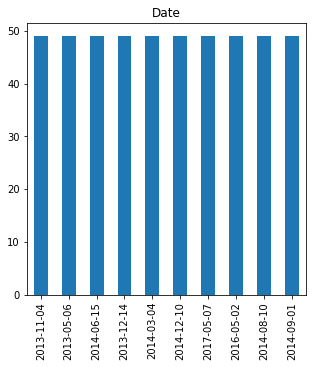

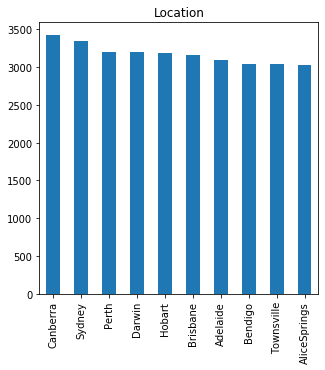

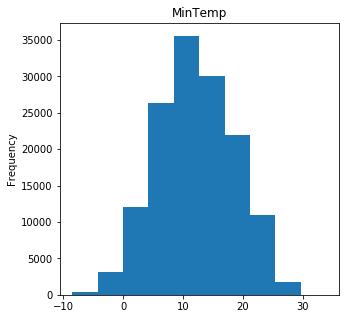

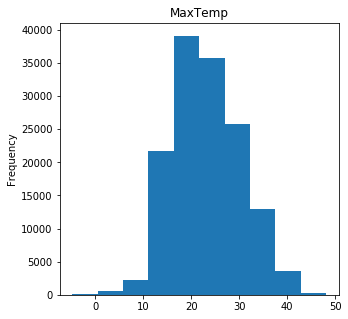

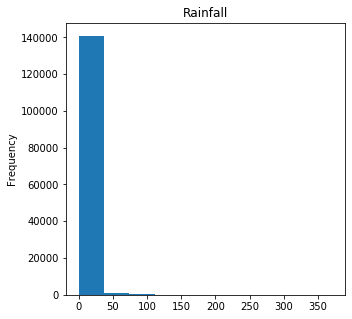

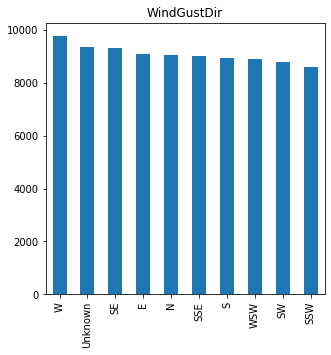

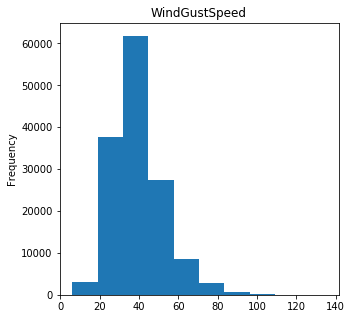

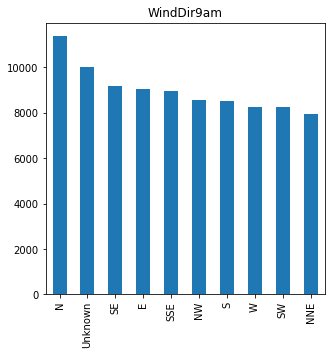

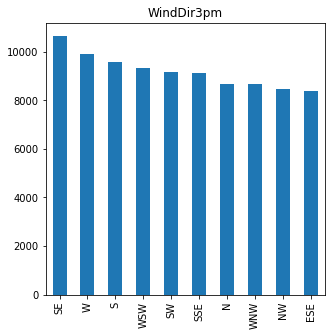

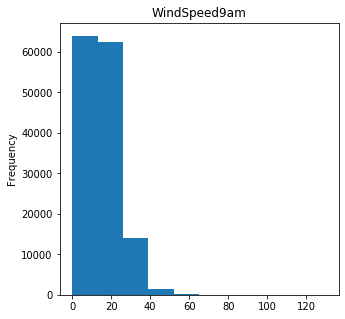

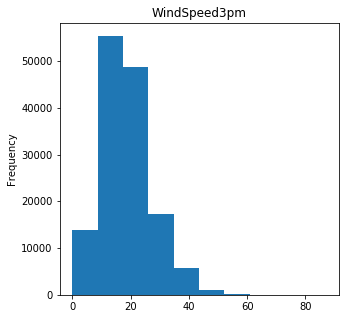

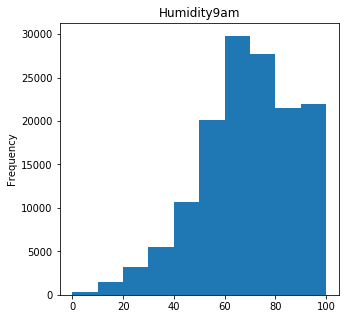

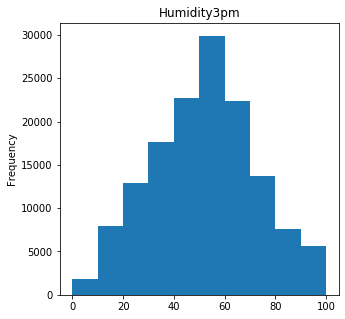

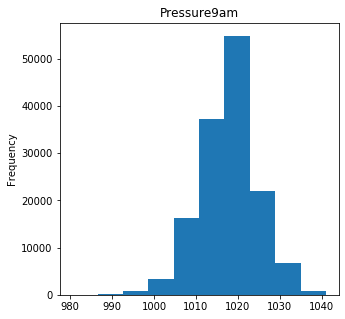

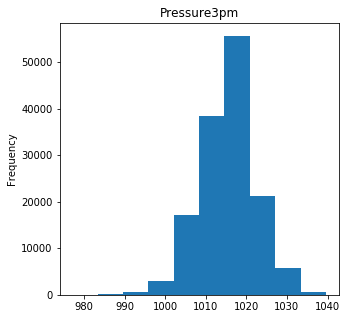

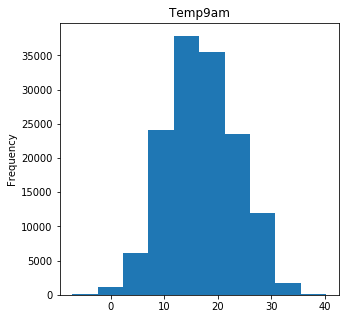

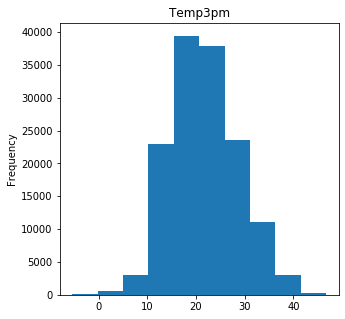

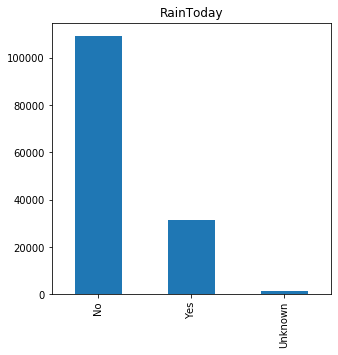

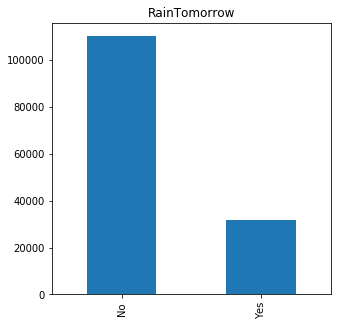

In [69]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar') #show only top 10 value count in each column

(127798, 19)

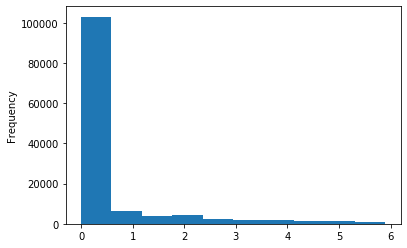

In [70]:
#address outliers in 'Rainfall'

maximum = df['Rainfall'].quantile(0.9)
df = df[df['Rainfall'] < maximum]
df["Rainfall"].plot(kind = 'hist')
df.shape